# "Magiczne" funkcje i programistyczna manipulacja notebookami

## Magiczne funkcje

Notebooki oferują kilka "magicznych" funckji (które zaczynają się od %). Nie wszystkie są równie przydatne - wybrałem te, które potencjalnie najbardziej mogą przydać się w pracy. Jeżeli chodzi o resztę funkcji, to odsyłam do dokumentacji Notebooków. Wybór może wydawać się trochę losowy, ale jest ich bardzo dużo i trzeba je po prostu przejrzeć, aby zobaczyć, które są dla nas interesujące.

### Wyświetlanie wykresów
Aby automatycznie wyświetlać wykresy w notebookach musimy użyć funkcji `%matplotlib inline`

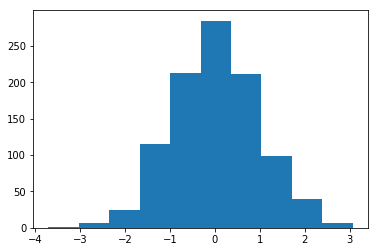

In [83]:
from matplotlib import pyplot as plt
from scipy.stats import norm
# bez tego polecenia nie zobaczymy wykresów, dostępne są inne niż inline opcje - odsyłam do dokumentacji
%matplotlib inline

plt.hist(norm.rvs(size = 1000)); # losujemy 1000 wartości z rozkładu normalnego i rysujemy ich histogram

### "Import" kodu z innych plików z kodem Pythona

In [97]:
# %load -s print_instructor_name fiddle.py # po wykonaniu umieszcza kod funkcji print_instructor_name w komórce
def print_instructor_name():
    print('Bartosz Maćkiewicz')

### Domyślna precyzja wyświetlania liczb

Możemy zmienić precyzję wyświetlania liczb w Notebookach. Przydatne, jeśli tworzymy coś w rodzaju raportu i nie chcemy, aby liczby były zbyt długie.

In [107]:
%precision
4.2131431

4.2131431

In [108]:
%precision 3
4.2131431

4.213

### Pomiar czasu wykonywania kodu

Jeżeli w pierwszej linijce komórki użyjemy funkcji `%%timeit`, to Python wykona ją r razy (domyślnie 7) i powie nam ile zajęło wykonywanie kodu. Bardzo przydatne, jeżeli chcemy, aby nasz kod działał szybciej (należy jednak uważać na przedwczesną optymalizację)

In [126]:
%%timeit
d = 0
for i in range(1523):
    d = ((d + i) * i)/(d+i+3)
d

233 µs ± 6.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Wykonywanie kodu używając shella

Czasami chcemy wykonać jakiś prosty skrypt albo polecenie w wierszu poleceń naszego systemu. Zazwyczaj `bash` jest dostępny (na MacOSX oraz Linuksie). Tutaj wyświetlam pliki w katalogu roboczym. Uwaga! Zwykle jeżeli chcemy coś robić bardziej zaawansowanego to warto przepisać to w zwykłym Pythonie, `%%bash` raczej powinien służyć w interaktywnej pracy. 

In [129]:
%%bash
ls -al

razem 1612
drwxr-xr-x  3 bartosz users   4096 01-28 11:47 .
drwxr-xr-x 10 bartosz users   4096 01-28 11:33 ..
-rw-r--r--  1 bartosz users  13847 01-28 10:33 01. Podstawowe funkcje Jupyter Notebooka.ipynb
-rw-r--r--  1 bartosz users 446521 01-28 11:47 02. Magiczne funkcje i programistyczna manipulacja notebookami .ipynb
-rw-r--r--  1 bartosz users    555 01-28 10:01 03. Eksport i udostępnianie notebooków.ipynb
-rw-r--r--  1 bartosz users  43354 01-25 12:33 doki.jpg
-rw-r--r--  1 bartosz users     62 01-28 11:36 fiddle.py
drwxr-xr-x  2 bartosz users   4096 01-28 10:00 .ipynb_checkpoints
-rw-r--r--  1 bartosz users 225400 01-25 12:41 poker-chips-daniel_simon.wav
-rw-r--r--  1 bartosz users 847425 01-28 11:12 video.mp4


## Programistyczna manipulacja notebookami

W Notebookach możemy używać różnych funkcji, które pozwalają nam dynamicznie tworzyć tekstową i multimedialną treść Notebooka. Takie możliwości mogą się przydać np. przy automatycznym generowaniu raportów lub tworzenia "pseudo" aplikacji zagnieżdżonych w Notebookach. Aby skorzystać z tych możliwości musimy zaimportować kilka funkcji z modułu `IPython.display`.

### Tekst

In [64]:
from IPython.display import Markdown, Audio, Code, DisplayHandle, FileLink, Video, YouTubeVideo, Image

Możemy łatwo wyświetlić za pomocą funkcji `Markdown` tekst sformatowany w składni Markdown (dostępne są także funkcje `HTML` oraz `Javascript` do zagnieżdżania kodu w tych dwóch językach w notebookach)

In [130]:
Markdown('**Możemy** wyświetlać *sformatowany* tekst')

**Możemy** wyświetlać *sformatowany* tekst

Korzystając z tych funkcji jesteśmy w stanie np napisać kod generujący ładnie sformatowany raport dotyczący ocen uzyskanych z filozofii języka:

In [131]:
dane = {'Bartosz' : 4,
        'Kasia' : 5,
        'Marysia' : 3}

raport = '\n\n'.join([f"**{p}** otrzymał/a ocenę **{str(m)}** z filozofii języka" for p, m in dane.items()])
Markdown(raport)

**Bartosz** otrzymał/a ocenę **4** z filozofii języka

**Kasia** otrzymał/a ocenę **5** z filozofii języka

**Marysia** otrzymał/a ocenę **3** z filozofii języka

Jeżeli byśmy chcieli, możemy również wyświetlić sformatowany kod.

In [40]:
Code('''dane = {'Bartosz' : 4,
        'Kasia' : 5,
        'Marysia' : 3}

raport = '\n\n'.join([f"**{p}** otrzymał/a ocenę **{str(m)}** z filozofii języka" for p, m in dane.items()])
display.Markdown(raport)
''', language='python')

dane = {'Bartosz' : 4,
        'Kasia' : 5,
        'Marysia' : 3}

raport = '

'.join([f"**{p}** otrzymał/a ocenę **{str(m)}** z filozofii języka" for p, m in dane.items()])
display.Markdown(raport)

Notebooki dają nam również możliwość *aktualizacji* dowolnej komórki. Trudno zademonstrować tę możliwość statycznie, jeżeli ściągną Państwo notebooka na dysk i wykonają kod w poniższych komórkach, to zrozumieją Państwo o co chodzi:

In [76]:
handle = DisplayHandle() # tworzymy obiekt, który pozwala nam modyfikować output tej komórki
handle.display(Markdown('Możemy raz stworzyć tekst w danym miejscu')) # wyświetlamy markdown

A potem go aktualizować

In [77]:
handle.update(Markdown('A potem go aktualizować')) # aktualizujemy markdown w komórce powyżej

### Multimedia

W notebookach możemy również łatwo osadzać multimedia. Poniżej znajdują się przykłady osadzania plików dźwiękowych, obrazów, oraz materiałów z serwisu społecznościowego YouTube.

In [78]:
Audio('poker-chips-daniel_simon.wav') # lokalna ścieżka do pliku

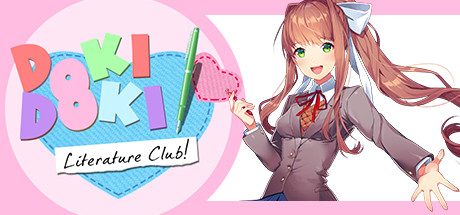

In [79]:
Image('doki.jpg') # lokalna ścieżka do pliku

In [80]:
Video('video.mp4') # lokalna ścieżka do pliku

In [59]:
FileLink("poker-chips-daniel_simon.wav") # lokalna ścieżka do pliku

/home/bartosz/data/Dropbox/Dropbox/projekty/semantyka_eksperymentalna_modul_programistyczny/02_Jupyter_Notebook/poker-chips-daniel_simon.wav

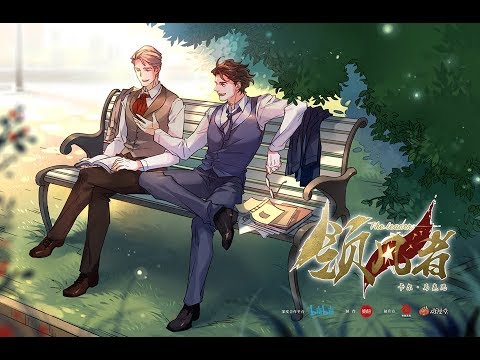

In [81]:
YouTubeVideo('4MFMaTycib4') # identyfikator materiału w serwisie YouTube